Libraries

In [10]:
import rasterio
from rasterio import plot

import cv2
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Function

In [12]:
def ndvi(b4_path,b5_path):
    print(b4_path)
    band4 = cv2.imread(f'{b4_path}')
    band5 = cv2.imread(f'{b5_path}')
    print(band4.mean())
    points_A = np.float32([[1723,4], [7858,1652], [19,6306], [6146,7977]])
    points_B = np.float32([[0,0], [6170,0], [0,6530], [6170,6530]])
    M = cv2.getPerspectiveTransform(points_A, points_B)
    
    b4_warped = cv2.warpPerspective(band4, M, (6170,6530))
    b5_warped = cv2.warpPerspective(band5, M, (6170,6530))
    
    b4_end = b4_path.split(".")[0][-5:]
    b5_end = b5_path.split(".")[0][-5:]
    cv2.imwrite("band4_"+b4_end+".TIF", b4_warped)
    cv2.imwrite("band5_"+b5_end+".TIF", b5_warped)
    
    band4 = rasterio.open(r"band4_"+b4_end+".TIF")
    band5 = rasterio.open(r"band5_"+b5_end+".TIF")
    
    red = band4.read(1).astype('float64')
    nir = band5.read(1).astype('float64')
    
    ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
    
    fig = plt.figure(figsize=(18,12))
    plot.show(ndvi)
    
    sns.distplot(ndvi.flatten())
   
    print(np.mean(ndvi))
    
# b4 = 'F:\LC08_L1TP_163056_20181228_20190129_01_T1\LC08_L1TP_163056_20181228_20190129_01_T1_B4.TIF'
# b5 = 'F:\LC08_L1TP_163056_20181228_20190129_01_T1\LC08_L1TP_163056_20181228_20190129_01_T1_B5.TIF'

# ndvi(b4,b5)

F:\LC08_L1GT_027034_20181219_20181227_01_T2\LC08_L1GT_027034_20181219_20181227_01_T2_B4.TIF
48.538736612335995


D:\Users\Akarshit\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)
D:\Users\Akarshit\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)
D:\Users\Akarshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


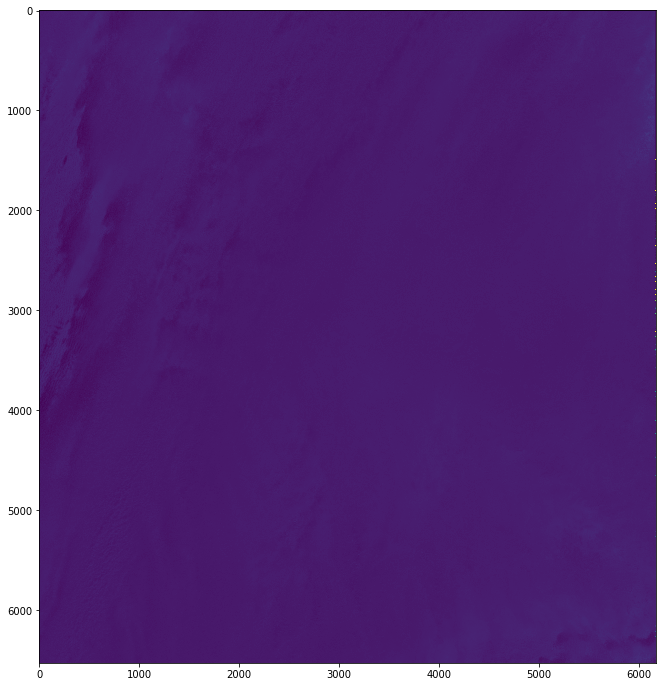

0.030832973930721572
Wall time: 19.6 s


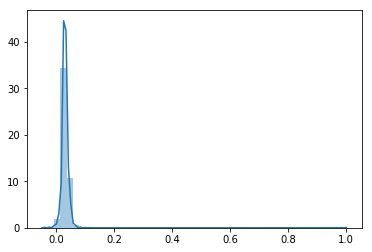

In [13]:
%%time
b4 = 'F:\LC08_L1GT_027034_20181219_20181227_01_T2\LC08_L1GT_027034_20181219_20181227_01_T2_B4.TIF'
b5 = 'F:\LC08_L1GT_027034_20181219_20181227_01_T2\LC08_L1GT_027034_20181219_20181227_01_T2_B5.TIF'

ndvi(b4,b5)

F:\som3\LC08_L1TP_179044_20181228_20190129_01_T1_B4.TIF
43.83049790022954


D:\Users\Akarshit\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)
D:\Users\Akarshit\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)
D:\Users\Akarshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


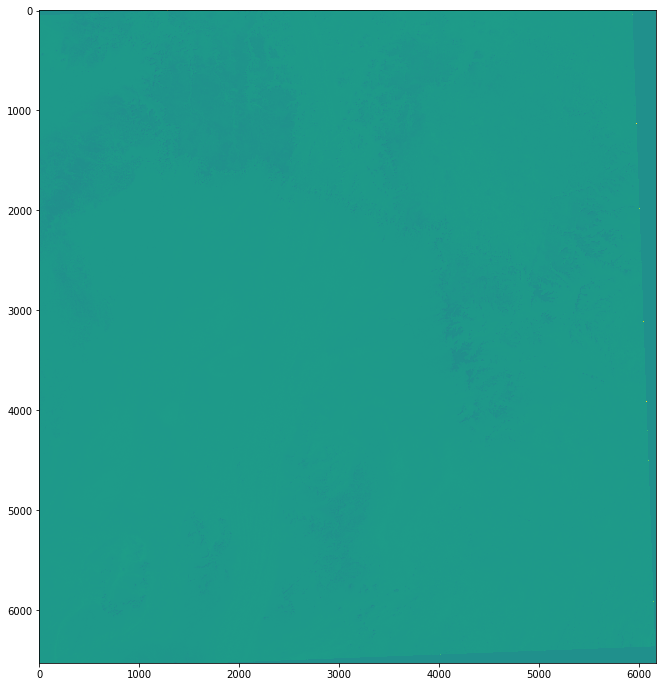

0.07609321786365765
Wall time: 26.5 s


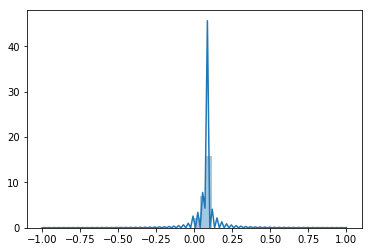

In [14]:
%%time
b4 = 'F:\som3\LC08_L1TP_179044_20181228_20190129_01_T1_B4.TIF'
b5 = 'F:\som3\LC08_L1TP_179044_20181228_20190129_01_T1_B5.TIF'

ndvi(b4,b5)